In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("D:\PRASUNET-03-TASK\DATA\Bank-Marketing.csv")

In [3]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [6]:
list(data.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [7]:
data.shape

(41188, 20)

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [10]:
f1 = encoder.fit_transform(data[["job","marital","education","housing","loan","month","poutcome","day_of_week"]]).toarray()

In [11]:
f1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
f2 = pd.DataFrame(f1,columns=encoder.get_feature_names_out())

In [13]:
f2

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
data2 = pd.concat([data,f2],axis=1)

In [15]:
data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [16]:
list(data2.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcom

In [17]:
data3 = data2.drop(columns=["contact","default","job_admin.","job","marital","education","housing","loan","month","poutcome","day_of_week"])

In [18]:
data3

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

data3["y"] = label.fit_transform(data3["y"])

In [20]:
data3.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


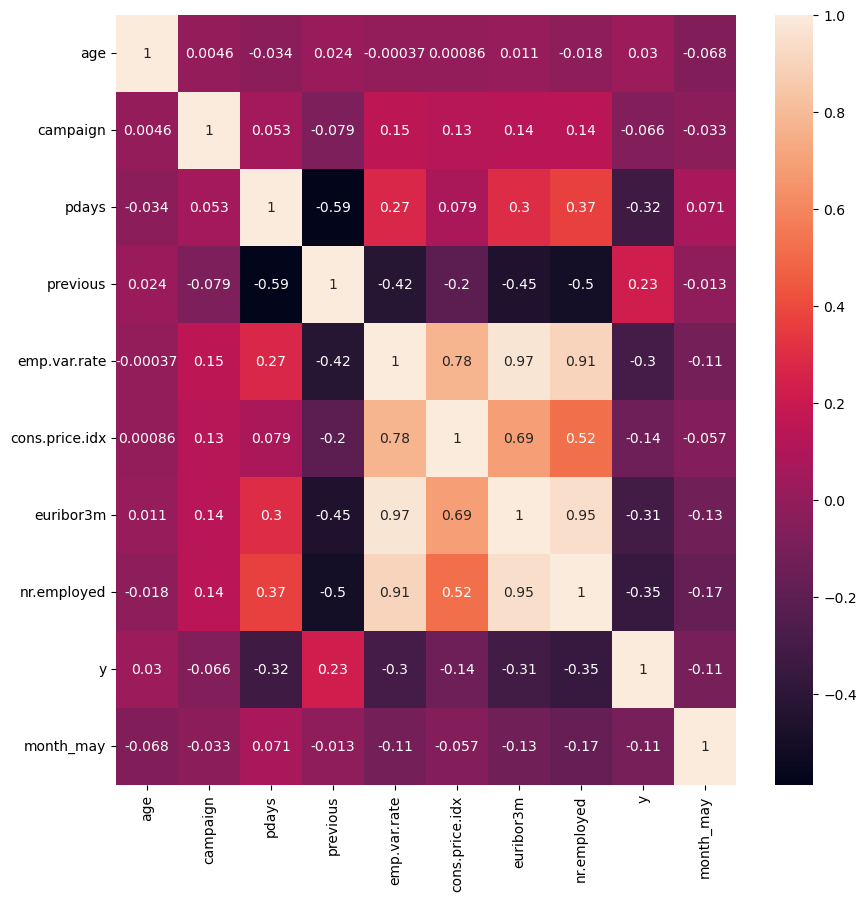

In [21]:
plt.figure(figsize=(10,10))
corr = data3[["age","campaign","pdays","previous","emp.var.rate","cons.price.idx","euribor3m","nr.employed","y","month_may"]].corr()

sns.heatmap(corr,annot=True)
plt.show()

In [22]:
data3.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654,...,0.017432,0.013839,0.103234,0.863431,0.033335,0.190031,0.206711,0.209357,0.196416,0.197485
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173,...,0.130877,0.116824,0.304268,0.343396,0.179512,0.392330,0.404951,0.406855,0.397292,0.398106
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
data3.isnull().sum()

age                              0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
job_unknown                      0
marital_divorced                 0
marital_married                  0
marital_single                   0
marital_unknown                  0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.schoo

In [24]:
x = data3.drop(columns=["y","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","job_unknown","job_blue-collar","marital_unknown",
                        "education_basic.4y","education_basic.6y","education_basic.9y","education_unknown","housing_unknown","loan_unknown",
                        "education_professional.course","job_self-employed","job_services","job_technician","education_high.school","poutcome_nonexistent"])
y = data3[["y"]]

In [25]:
x

,age,campaign,pdays,previous,job_entrepreneur,job_housemaid,job_management,job_retired,job_student,job_unemployed,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,1,999,0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,57,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,37,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,40,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,56,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41184,46,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41185,56,2,999,0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
41186,44,1,999,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
data3.rename(columns={'education_university.degree': 'education_university_degree'}, inplace=True)

In [27]:
x.columns

Index(['age', 'campaign', 'pdays', 'previous', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_student',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_illiterate', 'education_university.degree',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_success', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed'],
      dtype='object')

In [28]:
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=52)

In [30]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32950, 36), (8238, 36), (32950, 1), (8238, 1))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_df = scaler.fit_transform(x_train)
x_test_df = scaler.transform(x_test)

In [32]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3)

In [33]:
clf.fit(x_train_df,y_train)

DecisionTreeClassifier(max_depth=3)

In [34]:
y_pred = clf.predict(x_test_df)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8999757222626851
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      7954
           1       0.21      0.70      0.33       284

    accuracy                           0.90      8238
   macro avg       0.60      0.81      0.64      8238
weighted avg       0.96      0.90      0.92      8238

[[7214  740]
 [  84  200]]


In [37]:
import pickle
pickle.dump(clf,open("clf.pkl","wb"))
pickle.dump(scaler,open("scaler.pkl","wb"))